## 06. Reproduce the 2016 paper
**26 March 2025 by MiniUFO**

---
[TOC]

---
### 1. Introduction
Here we reproduce results from several papers on relative dispersion which used the same GLAD drifter dataset.  The first one is the second-order structure function, as well as its decompositions, shown by [Balwada et al. (2016)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL069405).

---

### 2. Calculation
#### 2.1 load the GLAD dataset

In [3]:
import numpy as np
import xarray as xr
import warnings
import sys
warnings.filterwarnings("ignore")
sys.path.append('../../../')
from xdispersion import RelativeDispersion

drifters = xr.open_dataset('../../../data/glad32.nc')

rd = RelativeDispersion(drifters, maxtlen=4*24*85, ragged=True, ID='traj',
                        xpos='longitude', uvel='ve', time='time', Rearth=6371.2,
                        ypos='latitude' , vvel='vn', coord='latlon')

pairs = rd.get_all_pairs()

there are 43518 pairs of particles


#### 2.2 Calculate structure functions
All the separation-based measures can be calculated by a single call and we only pick up those related to 2nd-order velocity structure functions:

In [4]:
from xdispersion import rotational_divergent_components, gen_rbins

alpha = 1.2
rbins = gen_rbins(0.001, 1000, alpha)

_, S2, S2L, S2T, _, _, _, _, _, _, _, _ = rd.r_based_measures(pairs, alpha, rbins)
S2r, S2d = rotational_divergent_components(S2L, S2T)

100%|█████████████████████████████████████| 43518/43518 [07:37<00:00, 95.16it/s]


#### 2.3 Plot the structure functions

Now we have the total structure functions S2, as well as its **longitudinal/transversal** components and **rotational/divergent** components.

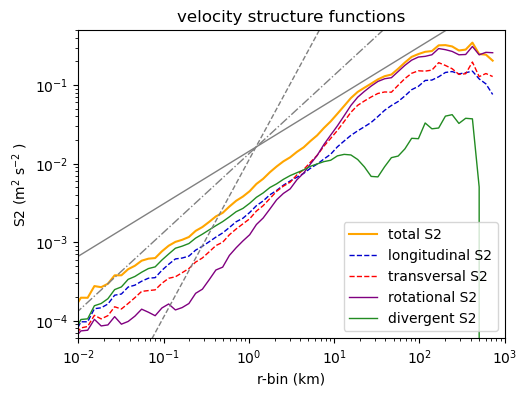

In [37]:
import matplotlib.pyplot as plt

m1 = S2.plot.line(xscale='log', yscale='log', figsize=(5.5,4), color='orange', lw=1.5, zorder=1, label='total S2')
m2 = S2L.plot(linestyle='--', color='mediumblue', lw=1, zorder=1, label='longitudinal S2')
m3 = S2T.plot(linestyle='--', color='r', lw=1, zorder=1, label='transversal S2')
m4 = S2r.plot(color='purple', lw=1, zorder=1, label='rotational S2')
m5 = S2d.plot(color='forestgreen', lw=1, zorder=1, label='divergent S2')
plt.plot(S2.rbin, S2.rbin**2/90, color='gray', lw=1, linestyle='--')
plt.plot(S2.rbin, S2.rbin/75, color='gray', lw=1, linestyle='-.')
plt.plot(S2.rbin, S2.rbin**(2/3)/70, color='gray', lw=1)
plt.legend([m1[0].get_label(), m2[0].get_label(), m3[0].get_label(),
            m4[0].get_label(), m5[0].get_label()], loc='lower right')
plt.xlim([1e-2, 1e3])
plt.ylim([6e-5, 5e-1])
plt.title('velocity structure functions')
plt.xlabel('r-bin (km)')
_ = plt.ylabel('S2 (m$^2$ s$^{-2}$ )')

### 3. Conclusions

This reproduced almost every aspect of Fig. 2a in [Balwada et al. (2016)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL069405).

### References:
- Balwada, D., J. H. LaCasce, and K. G. Speer, 2016: [Scale-dependent distribution of kinetic energy from surface drifters in the Gulf of Mexico](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL069405). *Geophys. Res. Lett.*, **43**, 10856-10863.